Up until this decade, the amount of three point attempts by players in the NBA has been on a slow but steady rise. However, with the three point explosion started by Stephen Curry in 2015, it has become apparent to players in the league that to have a chance of winning, three pointers were absolutely vital. In our project, we examine the change in three point attempts over time and where player shot attempts came from over the last 20 years, with a particular emphasis on centers. Centers of the past played close to the basket in the low post, but centers of today must have a good three point shot to thrive in today's league. We also predict the frequencies centers and not centers will take three point attempts for the 2020-2021 NBA season.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#This dataset contains player statistics from 1980 to 2020. It is a public dataset online. 

df = pd.read_csv('https://raw.githubusercontent.com/databyjp/learndata_nba/master/data/player_per_game.csv')
seasons = df['season'].to_numpy()
#print (df.head())

year = df['season'].values

rowcount = df.shape[0] 

select_pos = df.loc[df['pos'] == 'C']
#print (select_pos.head())

#put the percentages of each shot taken into these arrays for each center
twopt_arr = []
threept_arr = []
#print(df.columns)
#print(df)
#df = df.groupby(["name", 'pos', "season"], as_index = False).sum()
df

# This dataset has 20593 rows and 32 columns. Since we choose to analyze the change in
#type of shot attempts for centers over time, we focus primarily on columns concerning
# types of shots taken, the frequency at which they were taken, and of course the players'
# positions and names

,Unnamed: 0,name,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,link,season
0,0,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,37.2,10.5,18.2,0.574,0.0,0.0,0.000,10.5,18.2,0.574,0.574,5.3,6.9,0.766,2.5,7.8,10.3,3.4,0.7,2.9,3.1,3.1,26.2,/players/a/abdulka01.html,1981
1,1,Tom Abernethy,SF,26,TOT,39,NaN,7.6,0.6,1.5,0.424,0.0,0.0,0.000,0.6,1.5,0.431,0.424,0.3,0.6,0.591,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,/players/a/abernto01.html,1981
2,2,Tom Abernethy,SF,26,GSW,10,NaN,3.9,0.1,0.3,0.333,0.0,0.0,NaN,0.1,0.3,0.333,0.333,0.2,0.3,0.667,0.1,0.7,0.8,0.1,0.1,0.0,0.2,0.5,0.4,/players/a/abernto01.html,1981
3,3,Tom Abernethy,SF,26,IND,29,NaN,8.9,0.8,1.9,0.429,0.0,0.0,0.000,0.8,1.9,0.436,0.429,0.4,0.7,0.579,0.7,0.7,1.4,0.6,0.2,0.1,0.2,1.0,2.0,/players/a/abernto01.html,1981
4,4,Alvan Adams,C,26,PHO,75,NaN,27.4,6.1,11.6,0.526,0.0,0.0,NaN,6.1,11.6,0.526,0.526,2.7,3.5,0.768,2.1,5.2,7.3,4.6,1.4,0.9,3.0,3.0,14.9,/players/a/adamsal01.html,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20588,646,Trae Young,PG,21,ATL,60,60.0,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,/players/y/youngtr01.html,2020
20589,647,Cody Zeller,C,27,CHO,58,39.0,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,7.0,0.577,0.543,2.1,3.1,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,/players/z/zelleco01.html,2020
20590,648,Tyler Zeller,C,30,SAS,2,0.0,2.0,0.5,2.0,0.250,0.0,0.0,NaN,0.5,2.0,0.250,0.250,0.0,0.0,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,/players/z/zellety01.html,2020
20591,649,Ante Žižić,C,23,CLE,22,0.0,10.0,1.9,3.3,0.569,0.0,0.0,NaN,1.9,3.3,0.569,0.569,0.6,0.9,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,/players/z/zizican01.html,2020


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
multi_teams_index = np.array(df[df['team_id'] == 'TOT'].index)

In [ ]:
#rows are dropped among players who played on multiple teams in a single season,
#and only the row that keeps track of the total season statistics is kept
df = df.drop_duplicates(subset = ["name", "pos", "season"], keep="first")

In [ ]:
#We find the percentage of two pointers taken per game versus
#the percentage of three pointers

df["pct2s_per_game"] = df['fg2a_per_g']/df['fga_per_g']
df["pct3s_per_game"] = df['fg3a_per_g']/df['fga_per_g']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df.head()

,Unnamed: 0,name,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,link,season,pct2s_per_game,pct3s_per_game
0,0,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,37.2,10.5,18.2,0.574,0.0,0.0,0.0,10.5,18.2,0.574,0.574,5.3,6.9,0.766,2.5,7.8,10.3,3.4,0.7,2.9,3.1,3.1,26.2,/players/a/abdulka01.html,1981,1.000000,0.000000
1,1,Tom Abernethy,SF,26,TOT,39,NaN,7.6,0.6,1.5,0.424,0.0,0.0,0.0,0.6,1.5,0.431,0.424,0.3,0.6,0.591,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,/players/a/abernto01.html,1981,1.000000,0.000000
4,4,Alvan Adams,C,26,PHO,75,NaN,27.4,6.1,11.6,0.526,0.0,0.0,NaN,6.1,11.6,0.526,0.526,2.7,3.5,0.768,2.1,5.2,7.3,4.6,1.4,0.9,3.0,3.0,14.9,/players/a/adamsal01.html,1981,1.000000,0.000000
5,5,Darrell Allums,PF,22,DAL,22,NaN,12.5,1.0,3.0,0.343,0.0,0.0,0.0,1.0,3.0,0.348,0.343,0.6,1.0,0.591,0.9,2.1,3.0,1.1,0.2,0.4,1.0,2.3,2.7,/players/a/allumda01.html,1981,1.000000,0.000000
6,6,Tiny Archibald,PG,32,BOS,80,72.0,35.3,4.8,9.6,0.499,0.0,0.1,0.0,4.8,9.5,0.505,0.499,4.3,5.2,0.816,0.5,1.8,2.2,7.7,0.9,0.2,3.3,2.5,13.8,/players/a/architi01.html,1981,0.989583,0.010417


In [ ]:
#We make sure our dataset is not diluted by players who barely 
#played. Our criteria is that they must have played at least 
#15 of the 82 games in a season and played over 20 minutes per game

#dataframe of players who play the center position
centers = df[(df["pos"]=='C') & (df['g'] >= 15) & (df['mp_per_g'] >= 20.0)]

In [ ]:
#dataframe of players who do not play the center position
non_centers = df[(df["pos"]!='C') & (df['g'] >= 15) & (df['mp_per_g'] >= 20.0)]


In [ ]:
centers.columns

Index(['Unnamed: 0', 'name', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'link', 'season', 'pct2s_per_game', 'pct3s_per_game'],
      dtype='object')

In [ ]:
#We find how many points centers averaged per year and plot 

points_per_year = centers.groupby("season")["pts_per_g"].mean()

Text(0, 0.5, 'Points per Game')

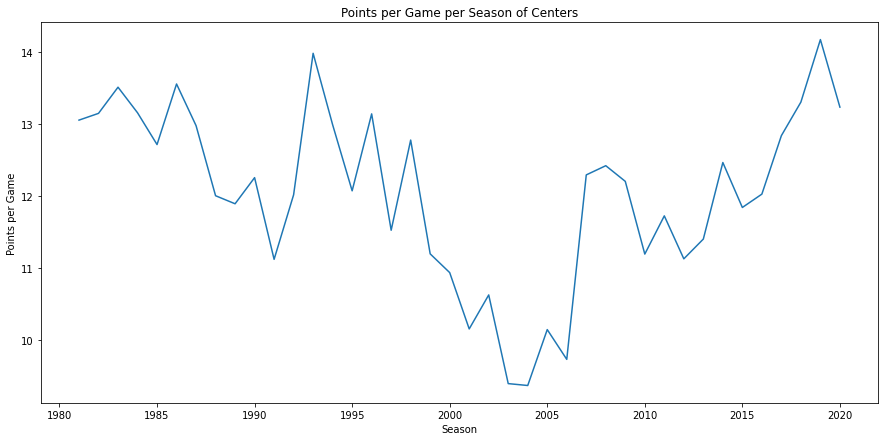

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(points_per_year)
plt.title("Points per Game per Season of Centers")
plt.xlabel("Season")
plt.ylabel("Points per Game")

In [ ]:
#We examine how many rebounds centers pull in on average
#per year

rebounds_per_year = centers.groupby("season")["trb_per_g"].mean()

Text(0, 0.5, 'Rebounds per Game')

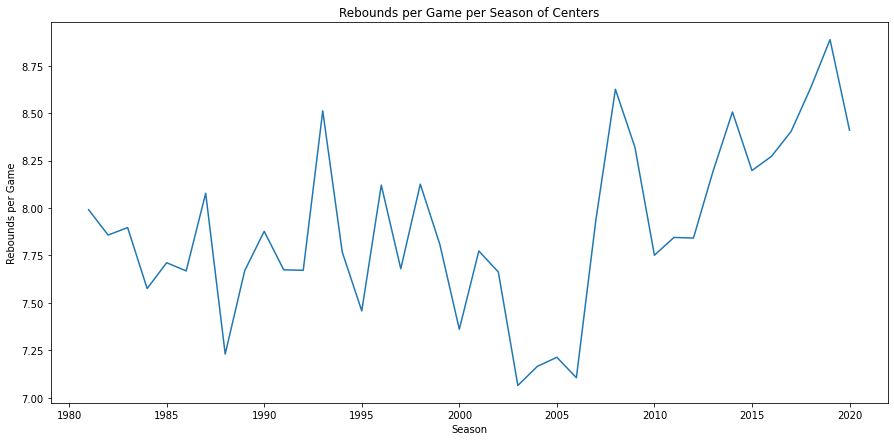

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(rebounds_per_year)
plt.title("Rebounds per Game per Season of Centers")
plt.xlabel("Season")
plt.ylabel("Rebounds per Game")

In [ ]:
#We narrow our focus to only offensive rebounds, 
#where players grab their own or a teammate's miss

offensive_rbs_year = centers.groupby("season")['orb_per_g'].mean()

Text(0, 0.5, 'Offensive Rebounds per Game')

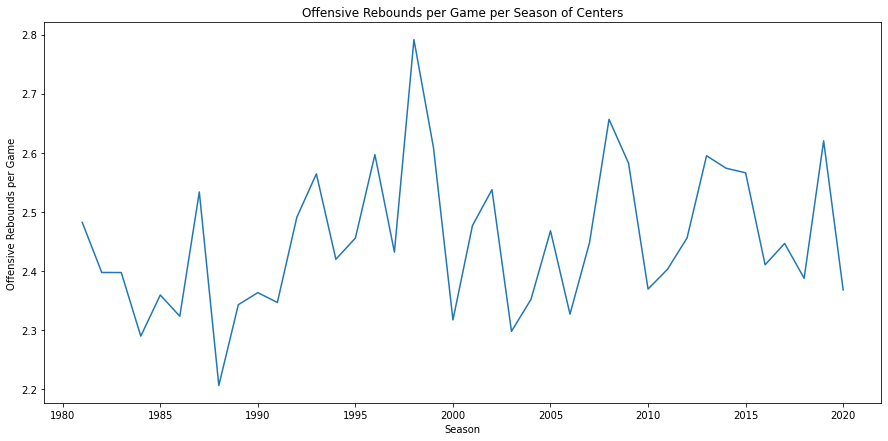

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(offensive_rbs_year)
plt.title("Offensive Rebounds per Game per Season of Centers")
plt.xlabel("Season")
plt.ylabel("Offensive Rebounds per Game")

In [ ]:
#We focus on defensive rebounds now, which are non-offensive rebounds

defensive_rbs_year = centers.groupby("season")['drb_per_g'].mean()

Text(0, 0.5, 'Defensive Rebounds per Game')

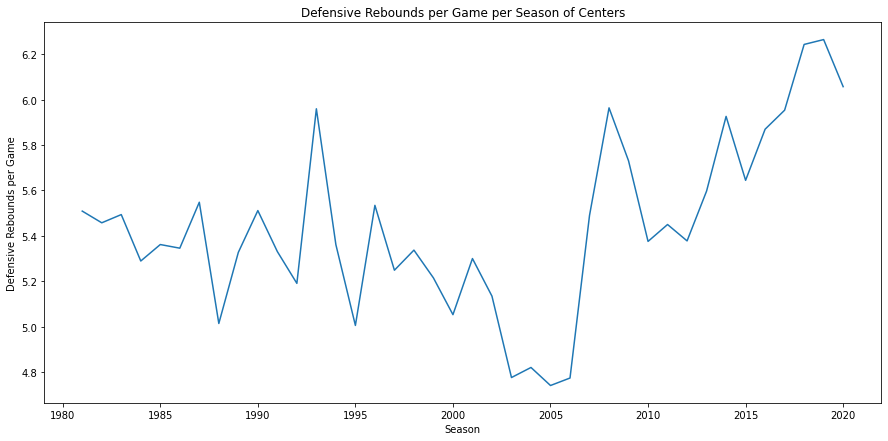

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(defensive_rbs_year)
plt.title("Defensive Rebounds per Game per Season of Centers")
plt.xlabel("Season")
plt.ylabel("Defensive Rebounds per Game")

In [ ]:
# we plotted the field goal percentage among centers, which is the percentage of made shots,
# and see if there was any correlation, and there was not
fg_pct_year = centers.groupby("season")['fg_pct'].mean()

Text(0.5, 1.0, 'FG % Among Centers Per Season')

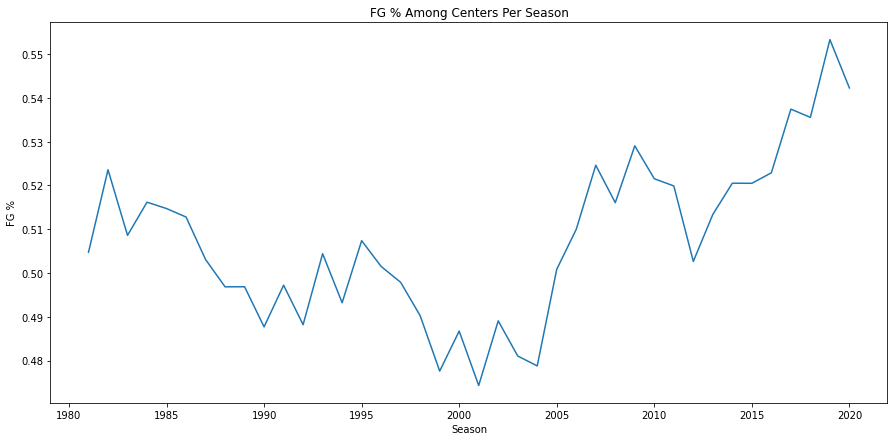

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fg_pct_year)
plt.xlabel("Season")
plt.ylabel("FG %")
plt.title("FG % Among Centers Per Season")

In [ ]:
# we plotted the field goal shot attempts among centers, which is the amount of shots that were taken per season,
# to see if there was any correlation, and there was not
fga_pct_year = centers.groupby("season")['fga_per_g'].mean()

Text(0, 0.5, 'FG Attemts per Game')

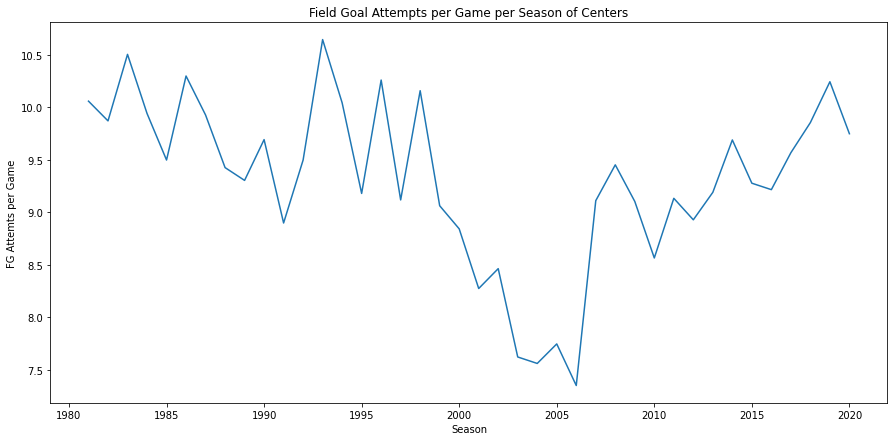

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fga_pct_year)
plt.title("Field Goal Attempts per Game per Season of Centers")
plt.xlabel("Season")
plt.ylabel("FG Attemts per Game")

In [ ]:
# this is where our actual analysis begins, as we first plotted the amount of 2-point shots and 3-point shots
# that were taken by centers each season since 1980-81
two_v_three = centers.groupby("season")[['fg2a_per_g', 'fg3a_per_g']].mean()

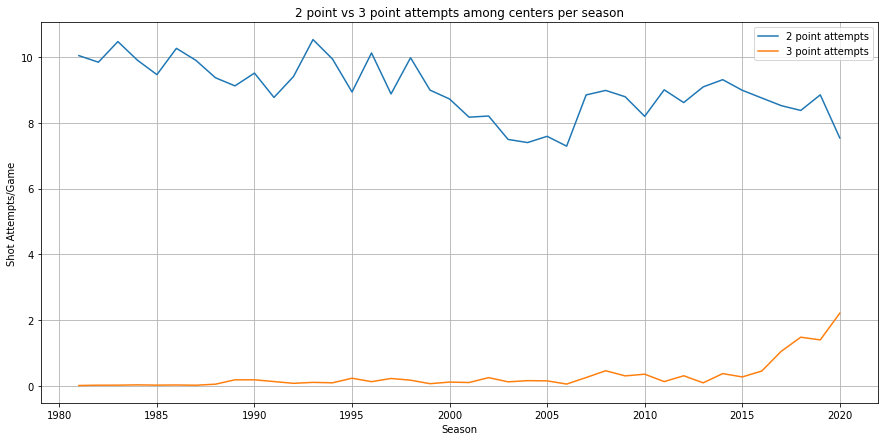

In [ ]:
two_v_three
plt.figure(figsize=(15,7))
plt.plot(two_v_three)
plt.title("2 point vs 3 point attempts among centers per season")
plt.xlabel("Season")
plt.ylabel("Shot Attempts/Game")
plt.grid()
plt.legend(["2 point attempts", "3 point attempts"], loc = "upper right")

In [ ]:
# we then plotted the amount of 2-point shots and 3-point shots that were taken by non-centers each season since 1980-81
two_v_three_all = non_centers.groupby("season")[['fg2a_per_g', 'fg3a_per_g']].mean()

Text(0, 0.5, 'Shot Attempts/Game')

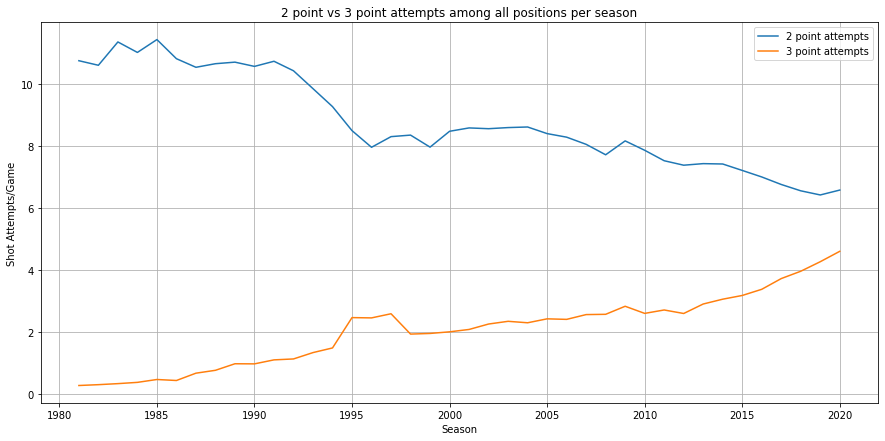

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(two_v_three_all)
plt.title("2 point vs 3 point attempts among all positions per season")
plt.grid()
plt.legend(["2 point attempts", "3 point attempts"], loc = "upper right")
plt.xlabel("Season")
plt.ylabel("Shot Attempts/Game")

In [ ]:
# we then plotted the percentage of shots that were taken among non-centers per game for each season,
# to see if it differed from the number of attempts taken per season, it did not really differ
# when it came to the trends
two_v_three_shots_pct = non_centers.groupby("season")[['pct2s_per_game', 'pct3s_per_game']].mean()

In [ ]:
seasons = two_v_three_shots_pct.index.to_numpy()

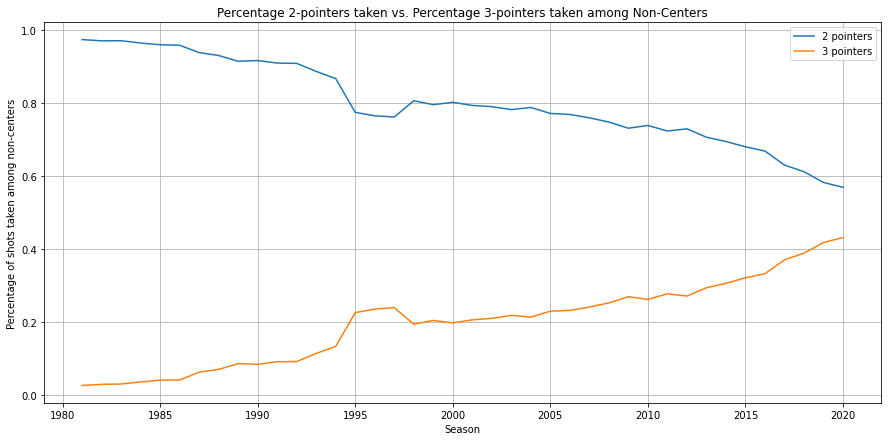

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(two_v_three_shots_pct)
plt.title("Percentage 2-pointers taken vs. Percentage 3-pointers taken among Non-Centers")
plt.xlabel("Season")
plt.ylabel("Percentage of shots taken among non-centers")
plt.grid()
plt.legend(["2 pointers", "3 pointers"], loc = "upper right")

In [ ]:
two_v_three_shots_pct = two_v_three_shots_pct.to_numpy()
two_v_three_shots_pct = two_v_three_shots_pct.T

R^2 for two-point regression: 0.9377990610847846
R^2 for three-point regression: 0.9380021350694745
In 2021, non-centers will shoot 2-pointers 60.66312966862881 percent of the time
In 2021, non-centers will shoot 3-pointers 39.34845226741217 percent of the time


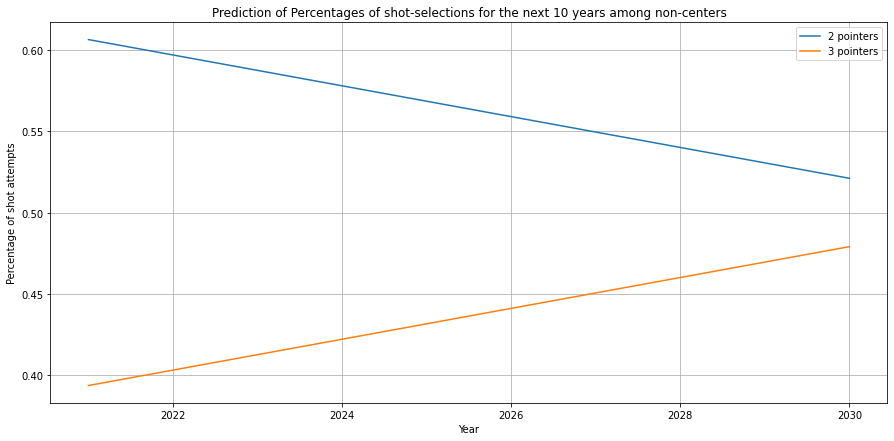

In [ ]:
# we then performed a linear regerssion on the percentages of shots taken among non-centers, to
# make predictions for future seasons

seasons = seasons.reshape(seasons.shape[0], 1)
two_point_prediction = LinearRegression().fit(seasons, two_v_three_shots_pct[0])
print("R^2 for two-point regression:", two_point_prediction.score(seasons, two_v_three_shots_pct[0]))
three_point_prediction = LinearRegression().fit(seasons, two_v_three_shots_pct[1])
print("R^2 for three-point regression:", three_point_prediction.score(seasons, two_v_three_shots_pct[1]))
future_ten_seasons = np.arange(2021, 2031)
future_ten_seasons = future_ten_seasons.reshape(future_ten_seasons.shape[0], 1)
two_point_pct = two_point_prediction.predict(future_ten_seasons)
three_point_pct = three_point_prediction.predict(future_ten_seasons)
print("In 2021, non-centers will shoot 2-pointers", two_point_pct[0]*100, "percent of the time")
print("In 2021, non-centers will shoot 3-pointers", three_point_pct[0]*100, "percent of the time")
plt.figure(figsize=(15,7))
plt.title("Prediction of Percentages of shot-selections for the next 10 years among non-centers")
plt.ylabel("Percentage of shot attempts")
plt.xlabel("Year")
plt.grid()
plt.plot(future_ten_seasons, two_point_pct)
plt.plot(future_ten_seasons, three_point_pct)
plt.legend(["2 pointers", "3 pointers"], loc = "upper right")

In [ ]:
# we also plotted the percentage of shots that were taken among centers per game for each season,
# to see if it differed from the number of attempts taken per season, it made the trends in shot
# attempts more clearer
centers_two_v_three_shots_pct = centers.groupby("season")[['pct2s_per_game', 'pct3s_per_game']].mean()

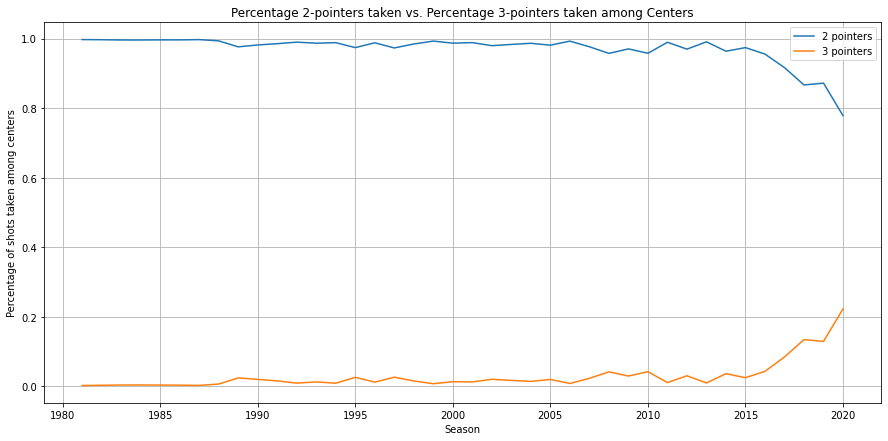

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(centers_two_v_three_shots_pct)
plt.title("Percentage 2-pointers taken vs. Percentage 3-pointers taken among Centers")
plt.xlabel("Season")
plt.ylabel("Percentage of shots taken among centers")
plt.grid()
plt.legend(["2 pointers", "3 pointers"], loc = "upper right")

In [ ]:
#seasons = np.arange(1981, 2021)
centers_two_v_three_shots_pct = centers_two_v_three_shots_pct.to_numpy()
centers_two_v_three_shots_pct = centers_two_v_three_shots_pct.T

In [ ]:
# the linear regression did not fit very well, so we calculated the slope and y-int from the 
# first and last percentages
two_point_slope = centers_two_v_three_shots_pct[0][-1] - centers_two_v_three_shots_pct[0][0]
two_point_slope /= seasons.shape[0]
two_point_int = centers_two_v_three_shots_pct[0][0] - two_point_slope*seasons[0]
two_point_slope
three_point_slope = centers_two_v_three_shots_pct[1][-1] - centers_two_v_three_shots_pct[1][0]
three_point_slope /= seasons.shape[0]
three_point_int = centers_two_v_three_shots_pct[1][0] - three_point_slope*seasons[0]

In [ ]:
#making predictions of 2-point and 3-point shot choice percentage among centers
future_ten_seasons = np.arange(2021, 2031)
centers_two_point_prediction = np.zeros((10,))
centers_three_point_prediction = np.zeros((10,))
centers_two_point_prediction = two_point_slope*future_ten_seasons + two_point_int
centers_three_point_prediction = three_point_slope*future_ten_seasons + three_point_int


In 2021, centers will shoot 2-pointers 77.81049033633352 percent of the time
In 2021, centers will shoot 3-pointers 22.25254356594526 percent of the time


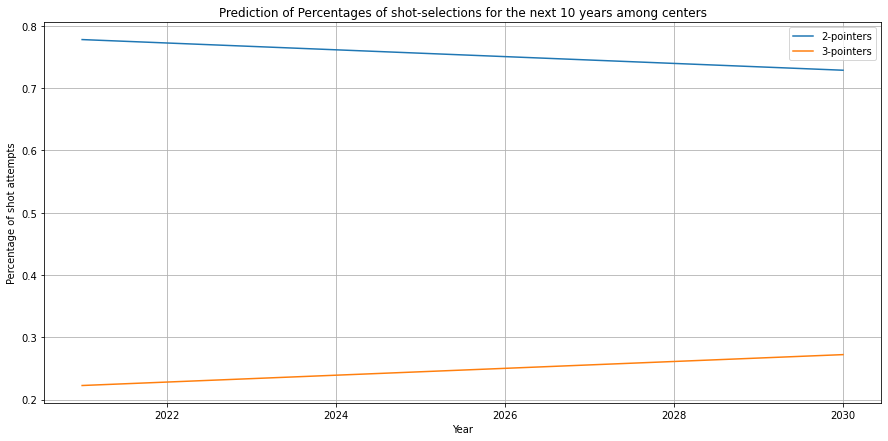

In [ ]:
#plotted predictions over next 10 seasons
plt.figure(figsize=(15,7))
plt.title("Prediction of Percentages of shot-selections for the next 10 years among centers")
plt.ylabel("Percentage of shot attempts")
plt.xlabel("Year")
plt.grid()
plt.plot(future_ten_seasons, centers_two_point_prediction)
plt.plot(future_ten_seasons, centers_three_point_prediction)
plt.legend(['2-pointers', '3-pointers'])
print("In 2021, centers will shoot 2-pointers", centers_two_point_prediction[0]*100, "percent of the time")
print("In 2021, centers will shoot 3-pointers", centers_three_point_prediction[0]*100, "percent of the time")

In [ ]:
#START FROM HERE

In [ ]:
#Here, we select dataframes for centers with our select statistics for
#the past twenty years

centers_2001 = centers[centers['season']==2001]
centers_2002 = centers[centers['season']==2002]
centers_2003 = centers[centers['season']==2003]
centers_2004 = centers[centers['season']==2004]
centers_2005 = centers[centers['season']==2005]
centers_2006 = centers[centers['season']==2006]
centers_2007 = centers[centers['season']==2007]
centers_2008 = centers[centers['season']==2008]
centers_2009 = centers[centers['season']==2009]
centers_2010 = centers[centers['season']==2010]
centers_2011 = centers[centers['season']==2011]
centers_2012 = centers[centers['season']==2012]
centers_2013 = centers[centers['season']==2013]
centers_2014 = centers[centers['season']==2014]
centers_2015 = centers[centers['season']==2015]
centers_2016 = centers[centers['season']==2016]
centers_2017 = centers[centers['season']==2017]
centers_2018 = centers[centers['season']==2018]
centers_2019 = centers[centers['season']==2019]
centers_2020 = centers[centers['season'] == 2020]

In [ ]:
#This function is used to clean our dataset by reading the csv, and dropping columns that are not relevant for our goal
def clean_dataset(dataset):
    year = pd.read_csv(dataset)
    cols_to_drop = ['Unnamed: 0', 'game_id', 'year', 'month', 'day', 'winner', 'loser', 'play', 'time_remaining', 'quarter', 'distance', 'team', 'winner_score', 'loser_score']
    year = year.drop(columns = cols_to_drop)
    return year

In [ ]:
#this function continues to clean the dataset, properly performs the inner join on the players' names,
#and converts the x and y columns to integers so they can be easily plotted without issue
def alter_data(center_data, year_data):
    center_data = center_data.copy()
    center_data = center_data[['name', 'pos', 'team_id', 'season']]
    names = np.array(center_data['name'])
    for i in range(len(names)):
        if(' Jr.' in names[i] or ' Sr.' in names[i]):
            names[i] = names[i][:-4]
        center_data['name'] = names    
            
    new_centers = center_data.join(year_data.set_index('shots_by'), on="name")
    new_centers = new_centers.dropna()
    x_col = np.array(new_centers['x'])
    y_col = np.array(new_centers['y'])
    attempts = np.array(new_centers['attempt'])
    areas = attempts
    for i in range(len(x_col)):
        x_col[i] = int(x_col[i][:-2])
        y_col[i] = int(y_col[i][:-2])
    new_centers['x'] = x_col
    new_centers['y'] = y_col
    new_centers['area'] = areas
    new_centers_missed = new_centers[new_centers['outcome']=="missed"]
    new_centers_made = new_centers[new_centers['outcome'] == 'made']
    
    return new_centers, new_centers_missed, new_centers_made

In [ ]:
#We use this function to plot the locations on the court of made shots for a selected season

def plot_made_shots(season, made_shots):
    two_pointers = made_shots[made_shots['attempt']=='2-pointer']
    three_pointers = made_shots[made_shots['attempt']=='3-pointer']
    plt.figure(figsize=(12,12))
    plt.title("Locations of Made Shots by Centers in the " + str(season-1) + '-' + str(season) + ' Season')
    im = plt.imread('/content/drive/MyDrive/Data Mining Project/basketball_court.png')
    plt.imshow(im)
    plt.scatter(two_pointers['x'], two_pointers['y'], c = 'green', alpha = 0.5)
    plt.scatter(three_pointers['x'], three_pointers['y'], c = "navy", alpha = 0.5)
    plt.legend(['2-pointer', '3-pointer'], loc = "lower right")
    plt.show()

In [ ]:
#We use this function to plot the locations on the court of all shots attempted for a selected season
def plot_all_shots(season, made_shots, missed_shots):
    plt.figure(figsize=(12,12))
    plt.title("Locations of All Shots by Centers in the " + str(season-1) + '-' + str(season) + ' Season')
    im = plt.imread('/content/drive/MyDrive/Data Mining Project/basketball_court.png')
    plt.imshow(im)
    plt.scatter(missed_shots['x'], missed_shots['y'], c = 'r', alpha = 0.75)
    plt.scatter(made_shots['x'], made_shots['y'], c = 'green', alpha = 0.5)
    plt.legend(['missed shots', 'made shots'], loc = 'lower right')
    plt.show()

In [ ]:
#please read file that we also submitted titled "Data Mining Project Graphs," it shows
# all shot charts from years 2001 to 2020. 
#Linked here: https://docs.google.com/document/d/1yXORg1nY6nIeaFfyqN-1GUbr6qCKWh7-Nm-7IHa5ihU/edit?usp=sharing

year_2001 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2000.csv")
#year_2002 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2001.csv")
# year_2003 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2002.csv")
# year_2004 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2003.csv")
# year_2005 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2004.csv")
# year_2006 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2005.csv")
# year_2007 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2006.csv")
# year_2008 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2007.csv")
# year_2009 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2008.csv")
# year_2010 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2009.csv")
# year_2011 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2010.csv")
# year_2012 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2011.csv")
# year_2013 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2012.csv")
# year_2014 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2013.csv")
# year_2015 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2014.csv")
year_2016 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2015.csv")
# year_2017 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2016.csv")
# year_2018 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2017.csv")
year_2019 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2018.csv")
year_2020 = clean_dataset("/content/drive/MyDrive/Data Mining Project/shot_data/shots-2019.csv")

In [ ]:
centers_shots_2001, centers_missed_2001, centers_made_2001 = alter_data(centers_2001, year_2001)
# centers_shots_2002, centers_missed_2002, centers_made_2002 = alter_data(centers_2002, year_2002)
# centers_shots_2003, centers_missed_2003, centers_made_2003 = alter_data(centers_2003, year_2003)
# centers_shots_2004, centers_missed_2004, centers_made_2004 = alter_data(centers_2004, year_2004)
# centers_shots_2005, centers_missed_2005, centers_made_2005 = alter_data(centers_2005, year_2005)
# centers_shots_2006, centers_missed_2006, centers_made_2006 = alter_data(centers_2006, year_2006)
# centers_shots_2007, centers_missed_2007, centers_made_2007 = alter_data(centers_2007, year_2007)
# centers_shots_2008, centers_missed_2008, centers_made_2008 = alter_data(centers_2008, year_2008)
# centers_shots_2009, centers_missed_2009, centers_made_2009 = alter_data(centers_2009, year_2009)
# centers_shots_2010, centers_missed_2010, centers_made_2010 = alter_data(centers_2010, year_2010)
# centers_shots_2011, centers_missed_2011, centers_made_2011 = alter_data(centers_2011, year_2011)
# centers_shots_2012, centers_missed_2012, centers_made_2012 = alter_data(centers_2012, year_2012)
# centers_shots_2013, centers_missed_2013, centers_made_2013 = alter_data(centers_2013, year_2013)
# centers_shots_2014, centers_missed_2014, centers_made_2014 = alter_data(centers_2014, year_2014)
# centers_shots_2015, centers_missed_2015, centers_made_2015 = alter_data(centers_2015, year_2015)
centers_shots_2016, centers_missed_2016, centers_made_2016 = alter_data(centers_2016, year_2016)
# centers_shots_2017, centers_missed_2017, centers_made_2017 = alter_data(centers_2017, year_2017)
# centers_shots_2018, centers_missed_2018, centers_made_2018 = alter_data(centers_2018, year_2018)
centers_shots_2019, centers_missed_2019, centers_made_2019 = alter_data(centers_2019, year_2019)
centers_shots_2020, centers_missed_2020, centers_made_2020 = alter_data(centers_2020, year_2020)

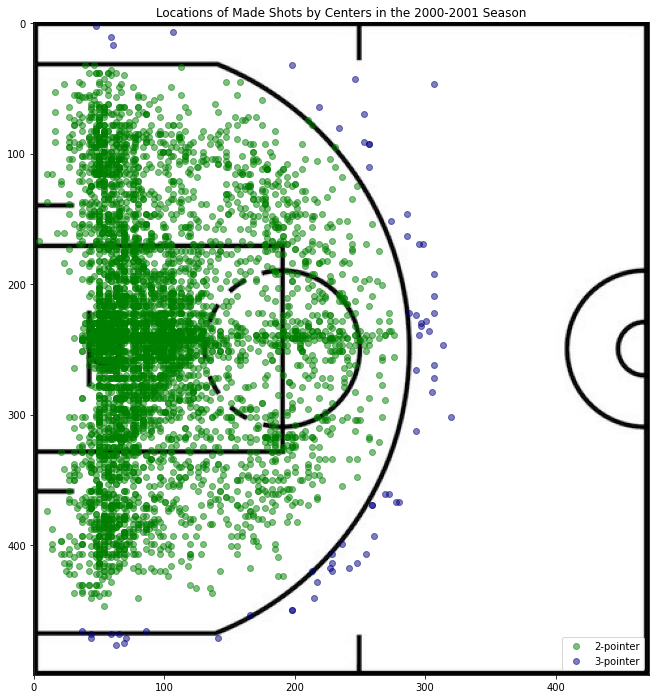

In [ ]:
# made shots among centers in the 2000-2001 season
plot_made_shots(2001, centers_made_2001)

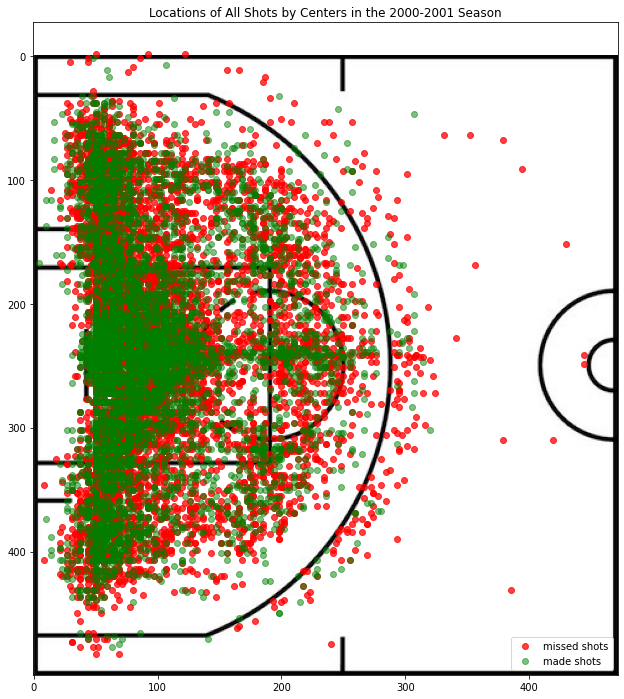

In [ ]:
# all shots attempted by centers in the 2000-2001 season
plot_all_shots(2001, centers_made_2001, centers_missed_2001)

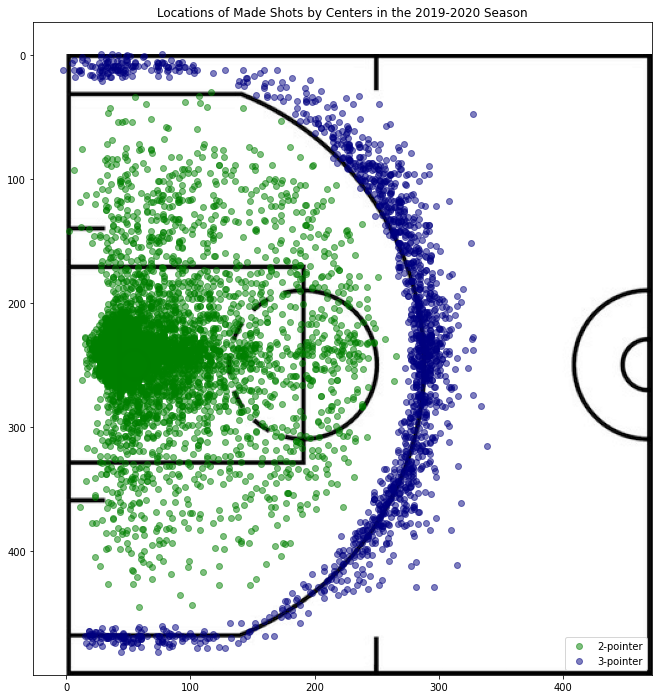

In [ ]:
# made shots among centers in the 2019-2020 season
plot_made_shots(2020, centers_made_2020)

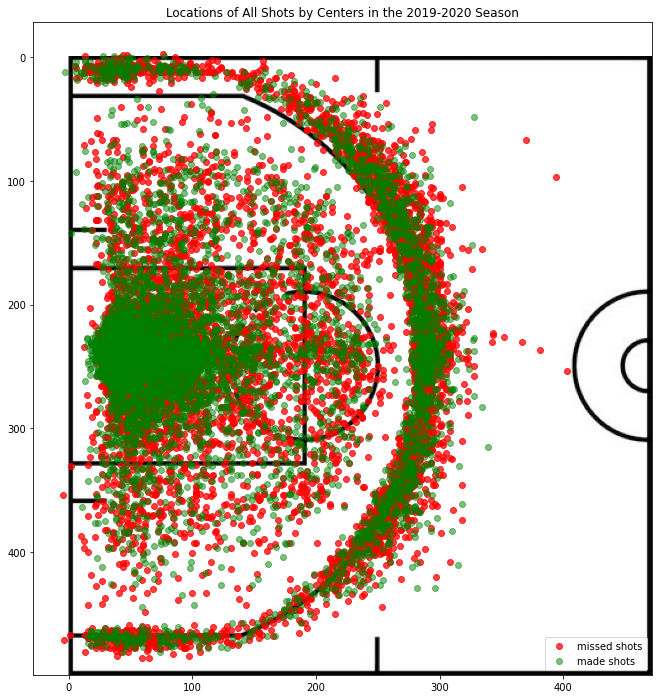

In [ ]:
# all shots attempted by centers in the 2019-2020 season
plot_all_shots(2020, centers_made_2020, centers_missed_2020)

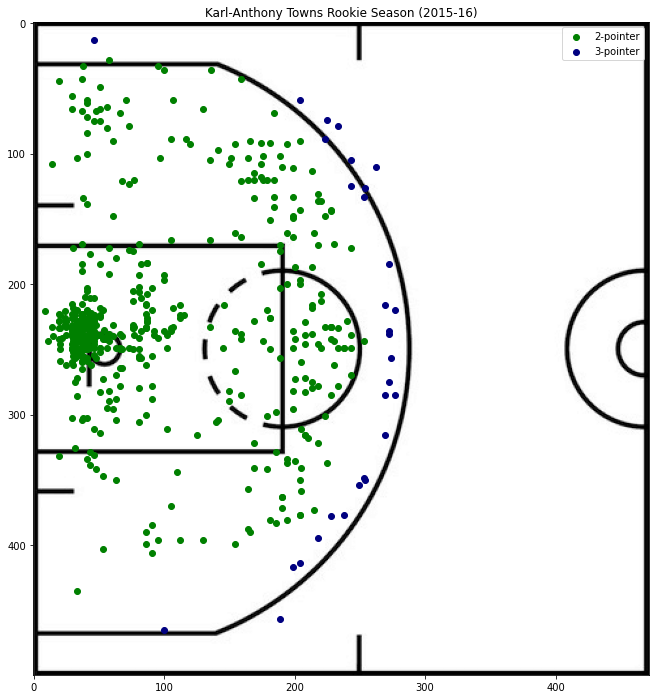

In [ ]:
#We print the shots made chart of Karl Anthony Towns, a superstar center in the NBA, 
#from his rookie year

kat = centers_shots_2016[centers_shots_2016['name'] == "Karl-Anthony Towns"]
kat_twos = kat[(kat['outcome'] == 'made') & (kat['attempt'] == '2-pointer')]
kat_threes = kat[(kat['outcome'] == 'made') & (kat['attempt'] == '3-pointer')]
kat_missed = kat[kat['outcome'] == 'missed']
plt.figure(figsize=(12,12))
plt.title("Karl-Anthony Towns Rookie Season (2015-16)")
im = plt.imread('/content/drive/MyDrive/Data Mining Project/basketball_court.png')
plt.imshow(im)
plt.scatter(kat_twos['x'], kat_twos['y'], c = 'green')
plt.scatter(kat_threes['x'], kat_threes['y'], c = "navy")
plt.legend(['2-pointer', '3-pointer'])


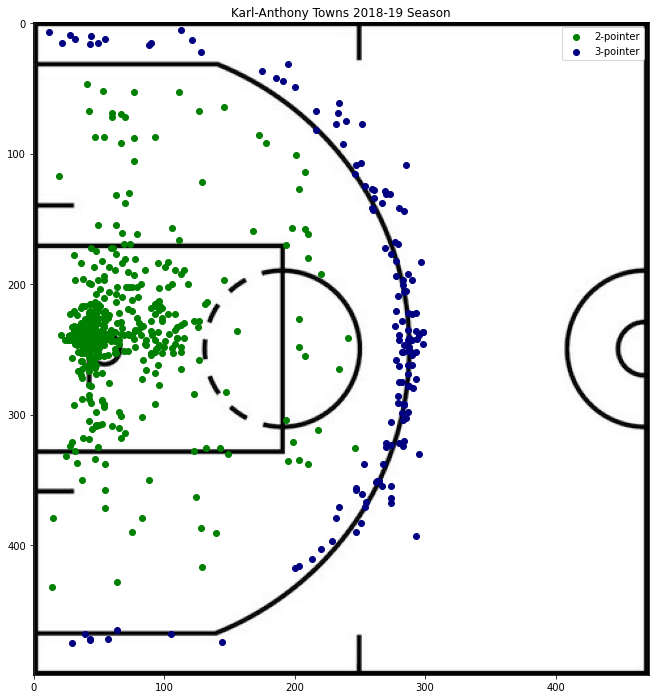

In [ ]:
#Now we do the same except for the 2018-2019 season. As you can see, 
#he makes far more threes only three years later

kat = centers_shots_2019[centers_shots_2019['name'] == "Karl-Anthony Towns"]
kat_twos = kat[(kat['outcome'] == 'made') & (kat['attempt'] == '2-pointer')]
kat_threes = kat[(kat['outcome'] == 'made') & (kat['attempt'] == '3-pointer')]
kat_missed = kat[kat['outcome'] == 'missed']
plt.figure(figsize=(12,12))
plt.title("Karl-Anthony Towns 2018-19 Season")
im = plt.imread('/content/drive/MyDrive/Data Mining Project/basketball_court.png')
plt.imshow(im)
plt.scatter(kat_twos['x'], kat_twos['y'], c = 'green')
plt.scatter(kat_threes['x'], kat_threes['y'], c = "navy")
plt.legend(['2-pointer', '3-pointer'])

In [ ]:
# plot_made_shots(2007, centers_made_2007)
# plot_all_shots(2007, centers_made_2007, centers_missed_2007)

In [ ]:
# plot_made_shots(2008, centers_made_2008)
# plot_all_shots(2008, centers_made_2008, centers_missed_2008)

In [ ]:
# plot_made_shots(2009, centers_made_2009)
# plot_all_shots(2009, centers_made_2009, centers_missed_2009)


In [ ]:
# plot_made_shots(2010, centers_made_2010)
# plot_all_shots(2010, centers_made_2010, centers_missed_2010)


In [ ]:
# plot_made_shots(2011, centers_made_2011)
# plot_all_shots(2011, centers_made_2011, centers_missed_2011)


In [ ]:
# plot_made_shots(2012, centers_made_2012)
# plot_all_shots(2012, centers_made_2012, centers_missed_2012)


In [ ]:
# plot_made_shots(2013, centers_made_2013)
# plot_all_shots(2013, centers_made_2013, centers_missed_2013)

In [ ]:
# plot_made_shots(2014, centers_made_2014)
# plot_all_shots(2014, centers_made_2014, centers_missed_2014)

In [ ]:
# plot_made_shots(2015, centers_made_2015)
# plot_all_shots(2015, centers_made_2015, centers_missed_2015)

In [ ]:
# plot_made_shots(2016, centers_made_2016)
# plot_all_shots(2016, centers_made_2016, centers_missed_2016)

In [ ]:
# plot_made_shots(2017, centers_made_2017)
# plot_all_shots(2017, centers_made_2017, centers_missed_2017)

In [ ]:
# plot_made_shots(2018, centers_made_2018)
# plot_all_shots(2018, centers_made_2018, centers_missed_2018)

In [ ]:
# plot_made_shots(2019, centers_made_2019)
# plot_all_shots(2019, centers_made_2019, centers_missed_2019)

In [ ]:
# plot_made_shots(2020, centers_made_2020)
# plot_all_shots(2020, centers_made_2020, centers_missed_2020)